In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind 
from scipy import stats
plt.figure(figsize=(15, 9))

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

In [68]:
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [69]:
# Print the first five rows of the DataFrame
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel is_retained  
0           NaT           House Ads        True  
1           NaT       

In [70]:
# Print the statistics of all columns
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [71]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: datetime64[ns](3), object(9)
memory usage: 941.0+ KB
None


In [72]:
 marketing['converted'] = marketing['converted'].astype('bool')
 print(marketing['converted'].dtype)

bool


In [73]:
marketing['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [74]:
marketing['marketing_channel'].isnull().sum()

15

In [75]:
marketing['is_house_ads'] = np.where(
    marketing['marketing_channel'] == 'House Ads',
     True, False
)
marketing.is_house_ads.head(3)

0    True
1    True
2    True
Name: is_house_ads, dtype: bool

In [76]:
marketing.is_house_ads.value_counts()

False    5304
True     4733
Name: is_house_ads, dtype: int64

In [77]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
marketing['channel_code'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64

In [78]:
marketing['day_served'] = marketing['date_served'].dt.dayofweek
marketing['day_served'].value_counts()

0.0    1993
2.0    1644
1.0    1629
5.0    1275
4.0    1170
3.0    1156
6.0    1154
Name: day_served, dtype: int64

In [79]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [80]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


In [81]:
retained = marketing[marketing['is_retained'] == True]
retained.count()

user_id                9460
date_served            9444
marketing_channel      9445
variant                9460
converted              9460
language_displayed     9460
language_preferred     9460
age_group              9460
date_subscribed        1279
date_canceled             0
subscribing_channel    1279
is_retained            9460
is_house_ads           9460
channel_code           1279
day_served             9444
dtype: int64

In [82]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


In [83]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

In [84]:
marketing['is_correct_lang'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: is_correct_lang, dtype: object

In [85]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## EDA

### How many unique users watch our marketing assest?

In [86]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


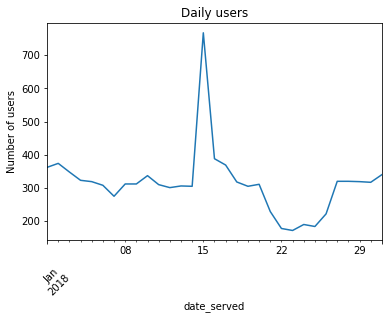

In [87]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

## Common marketing metrics
### Was the camaign successful?
- Coversion rate - how many bought the product? (Num of converted people / total number of marketed to)
- Retention rate - customer loyalty?

In [88]:
# calc the comversion rate
subcribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()

conv_rate = subcribers / total
print('Coversion rate: ',round(conv_rate*100, 2), '%')

Coversion rate:  14.09 %


In [89]:
# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()


# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()



# Calculate the retention rate
retention_rate = retained / total_subscribers
print(round(retention_rate*100, 2), "%")

676.41 %


## Customer Segmentation
### by each group - low conversion rate but a super effective to a specific group
- By channels

In [90]:
#Subset to include only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']

retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()
retention_rate = retained/subscribers
print('Retension rate in House Ads channcel:',round(retention_rate*100,2), '%')

Retension rate in House Ads channcel: 58.05 %


In [91]:
 # Group by subscribing_channel and calculate retention
 # retained by channel
 retained = marketing[marketing['is_retained'] == True]\
            .groupby(['subscribing_channel'])['user_id'].nunique()
 
 print(retained)    

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [92]:
# subscribers by channel
subcribers = marketing[marketing['converted'] == True].groupby( 
            ['subscribing_channel'])['user_id'].nunique()
 
print(subcribers)    

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [93]:
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        47.315436
Facebook     51.006711
House Ads    58.053691
Instagram    53.020134
Push         18.120805
Name: user_id, dtype: float64


### english speakers conversion rate

In [94]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


## Language conversion rate

In [95]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


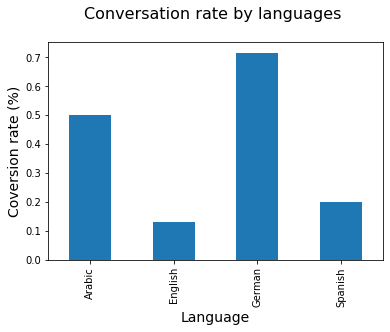

In [96]:
language_conversion_rate.plot(kind = 'bar')
plt.title('Conversation rate by languages \n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Coversion rate (%)', size = 14)
plt.show()

### daily conversion rate

In [97]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate.head())

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64


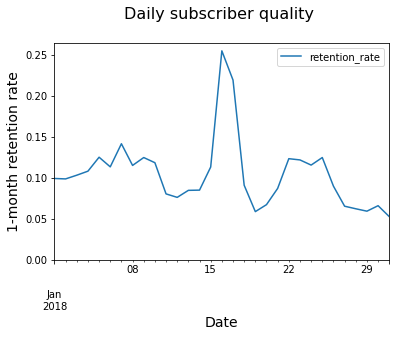

In [98]:
# reset index to turn the Series into dataframe
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())
# rename columns 
daily_conversion_rate.columns = ['date_subscribed', 'retention_rate']

daily_conversion_rate.plot('date_subscribed', 'retention_rate')
plt.title('Daily subscriber quality \n', size = 16)
plt.ylabel('1-month retention rate', size = 14)
plt.xlabel('Date', size = 14)
# set the y-axes to begins at 0
plt.ylim(0)
plt.show()

## plotting campage results

In [99]:
language = marketing.groupby(['date_served', 'language_preferred']) ['user_id'].count()
language.head()

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64

In [100]:
# unstack the 2nd indexes = level 1
language = pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


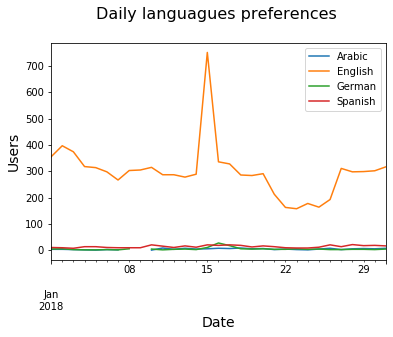

In [101]:
language.plot()
plt.title('Daily languagues preferences \n', size = 16)
plt.xlabel('Date', size = 14)
plt.ylabel('Users', size = 14)
plt.legend(loc = 'upper right', labels = language.columns.values)
plt.show()

## Languagues preferences by age group

In [102]:
# group by ages
language_age = marketing.groupby(['language_preferred', 'age_group']) ['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
language_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


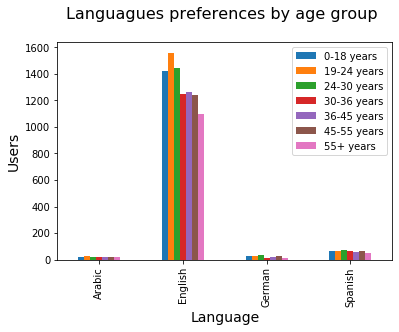

In [103]:
language_age.plot(kind='bar')
plt.title('Languagues preferences by age group \n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Users', size = 14)
plt.legend(loc = 'upper right', labels = language_age.columns.values)
plt.show()

## Channel preferences by age group

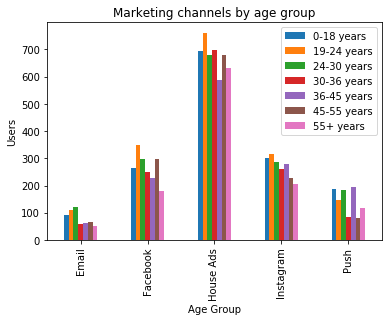

In [104]:
 channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

## Analyzing retention rates for the campaign

In [105]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [106]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


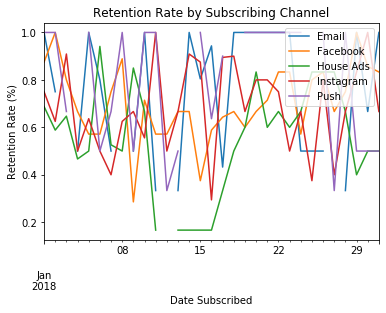

In [107]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

## build functions to automate analysis

In [108]:
# build a retention function
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()

    # Group by column_names and calculate coversion
    converted = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained / converted

    return retention_rate

In [109]:
daily_retention = retention_rate(marketing, ['date_subscribed', 'subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram  Push
date_subscribed                                                 
2018-01-01             1.0       1.0        1.0        1.0   1.0
2018-01-02             1.0       1.0        1.0        1.0   1.0
2018-01-03             NaN       1.0        1.0        1.0   1.0
2018-01-04             1.0       1.0        1.0        1.0   NaN
2018-01-05             1.0       1.0        1.0        1.0   1.0


In [110]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

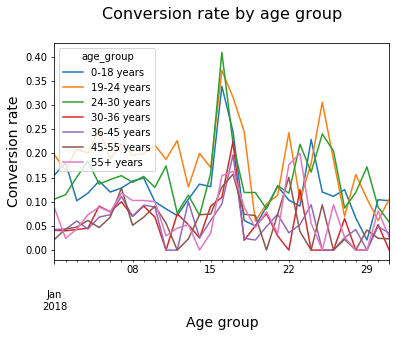

In [111]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served',
                                             'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

## Plotting daily retention by channel

In [112]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

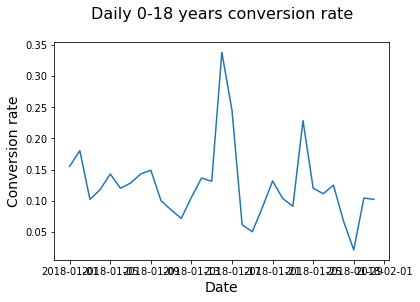

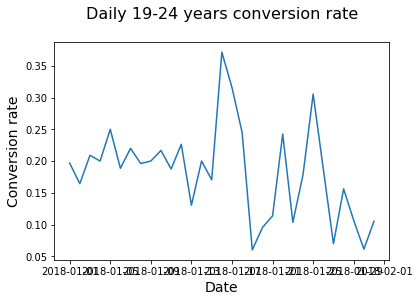

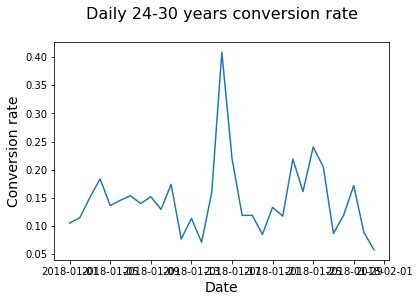

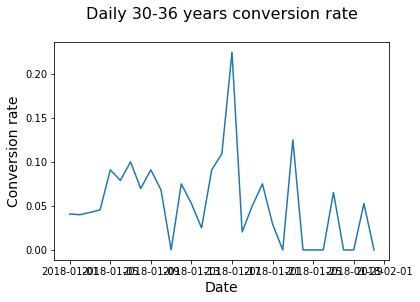

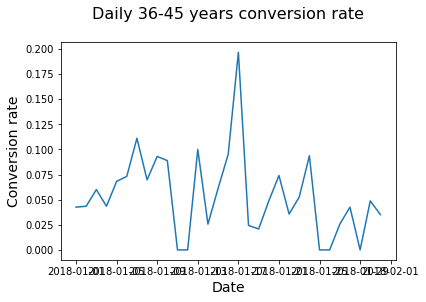

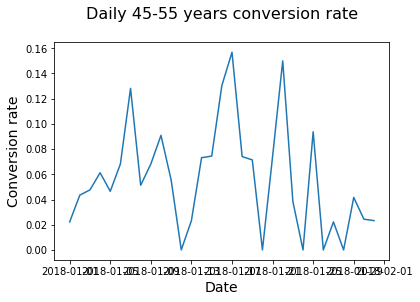

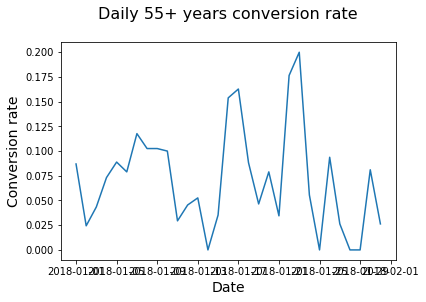

<Figure size 432x288 with 0 Axes>

In [113]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

## Identifying inconsistencies
### Day of the week trends

In [114]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


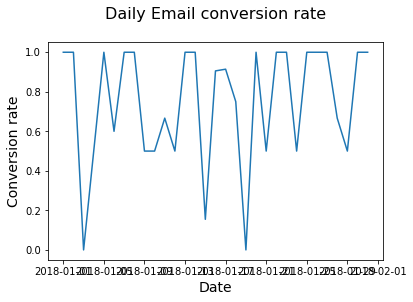

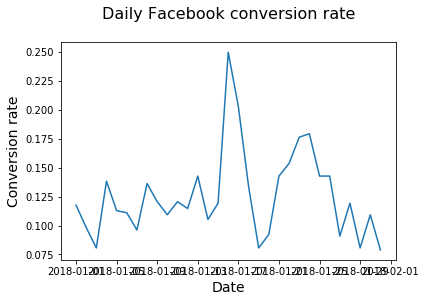

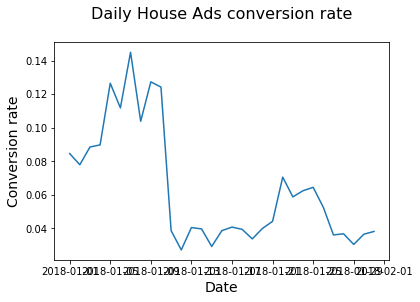

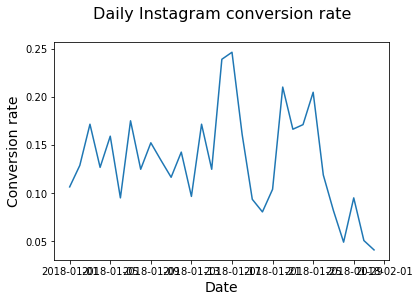

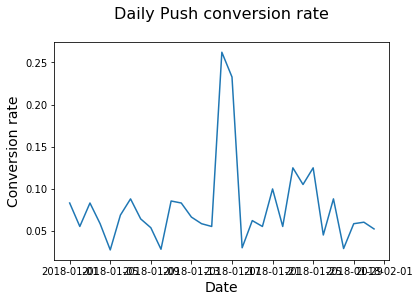

<Figure size 432x288 with 0 Axes>

In [115]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

### Analyzing House ads conversion rate

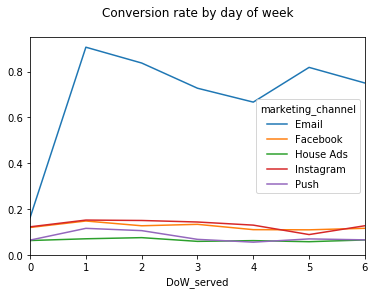

In [116]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

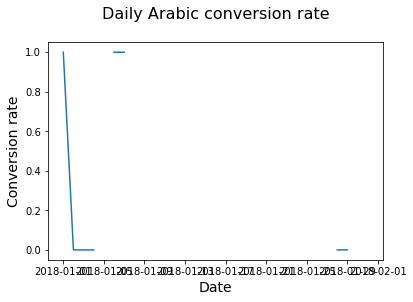

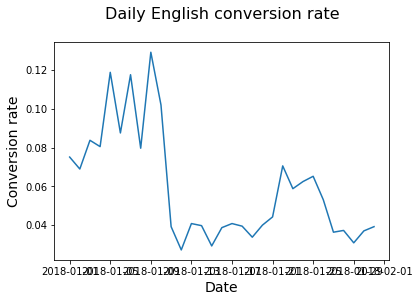

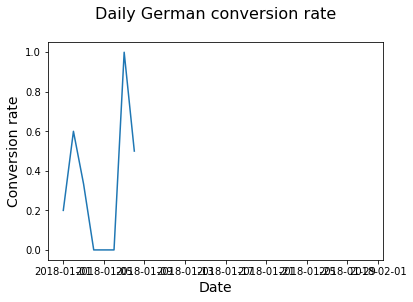

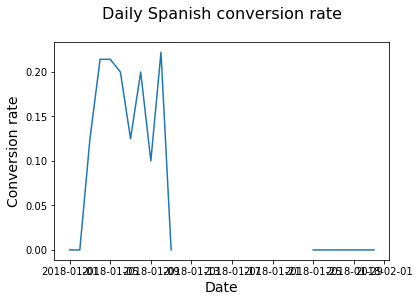

<Figure size 432x288 with 0 Axes>

In [117]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

In [118]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


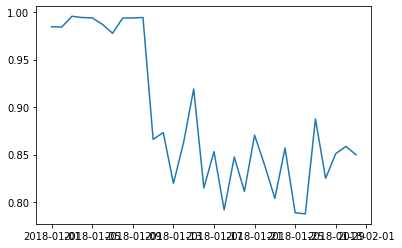

<Figure size 1080x648 with 0 Axes>

In [120]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.figure(figsize=(15, 9))
plt.show()

### identiy that house ads got decreases because it only runs in English rather than user's preferred langs

In [162]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [169]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

In [170]:
converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

In [164]:

# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))

In [166]:
type(converted)

pandas.core.frame.DataFrame

In [177]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]
converted_df['english_conv_rate']

date_served
2018-01-01    NaN
2018-01-02    NaN
2018-01-03    NaN
2018-01-04    NaN
2018-01-05    NaN
2018-01-06    NaN
2018-01-07    NaN
2018-01-08    NaN
2018-01-09    NaN
2018-01-10    NaN
2018-01-11    6.0
2018-01-12    3.0
2018-01-13    5.0
2018-01-14    6.0
2018-01-15    6.0
2018-01-16    6.0
2018-01-17    2.0
2018-01-18    5.0
2018-01-19    4.0
2018-01-20    4.0
2018-01-21    5.0
2018-01-22    4.0
2018-01-23    5.0
2018-01-24    6.0
2018-01-25    4.0
2018-01-26    4.0
2018-01-27    4.0
2018-01-28    4.0
2018-01-29    3.0
2018-01-30    4.0
2018-01-31    4.0
Name: english_conv_rate, dtype: float64

In [178]:
# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

In [180]:
# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

In [185]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print('The company lost - ', int(lost_subs), 'subscribers in date bug')

The company lost -  32 subscribers in date bug


## A/B Testing in Marketing Campagins

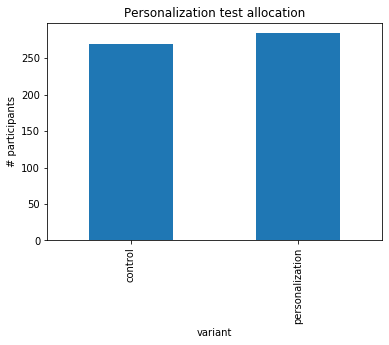

In [186]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [187]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### Calculating Life and significant testing
- lift = (treatment control rate - control conversion rate)/control convert rate
- significant testing is conducted by two samples T test

In [190]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [198]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [201]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [202]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 


